### S03T02 EXERCICI 3


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pywaffle import Waffle
from pySankey import sankey
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# elegim el nom de les columnes 
column_names = ['id', 'title', 'genre']
df_movies = pd.read_table('movies.dat', header = None, sep = "::", names= column_names, engine = 'python', 
                       encoding = "ISO-8859-1")

In [ ]:
# extraiem l' any del títol i creem una nova columna per l' any
df_movies['year'] = df_movies['title'].str.extract(r"\(([0-9]+)\)", expand=False).copy()
# esborrem l´any del títol 
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '').copy()

In [4]:
# separem les columnes pel símbol | 
genres =df_movies['genre'].str.split('|', expand = True)
# canviem el nom de les noves columnes 
mapping = {genres.columns[0]: 'cat1', genres.columns[1]: 'cat2', genres.columns[2]: 'cat3', 
          genres.columns[3]: 'cat4', genres.columns[4]: 'cat5', genres.columns[5] : 'cat6'}
new_genres = genres.rename(columns = mapping)

In [5]:
# juntem ara el nou dataframe amb el que ja teníem
movies= pd.concat([df_movies, new_genres], axis = 1 )

* **Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.**

Com hem vist en l'últim gràfic, és posible que en mirar més enllà de la categoria 1 del gènere poguem treure alguna informació. Primer mirarem **quantes vegades aparaeix cada gènere en cada categoria i després ho sumarem per poder tenir així el nombre total de cops que apareix cada gènere al dataset.**

In [6]:
genre_counts = movies[['cat1', 'cat2', 'cat3',
       'cat4', 'cat5', 'cat6']].apply(pd.Series.value_counts)

In [7]:
#Canviarem els valors faltants per ceros 
genre_counts = genre_counts.fillna(0)
# sumen tot a una nova columna 
genre_counts['total_counts'] = genre_counts.sum(axis = 1)
genre_counts = genre_counts.sort_values(by= ['total_counts'], ascending= False)
genre_counts[:5]

,cat1,cat2,cat3,cat4,cat5,cat6,total_counts
Drama,1176,381.0,38.0,8.0,0.0,0.0,1603.0
Comedy,1024,129.0,43.0,4.0,0.0,0.0,1200.0
Action,503,0.0,0.0,0.0,0.0,0.0,503.0
Thriller,101,228.0,120.0,40.0,3.0,0.0,492.0
Romance,50,327.0,81.0,10.0,3.0,0.0,471.0


Aquí tenim els gèneres que apareixen més cops al dataset tenint en compte **totes les categories**. Tornem a veure **Drama, Comedia i Acció** als 3 primers llocs, pero veiem que els gèneres **Thriller i Romance** pujen al mirar totes les dades (anteriorment eren al lloc 8 i 11 respectivament). 

Una forma visual de poder veure **el pes que té cada gènere en el total podria ser un Waffle Chart,** que assigna un color a cada variable segons la seva participació en el total.

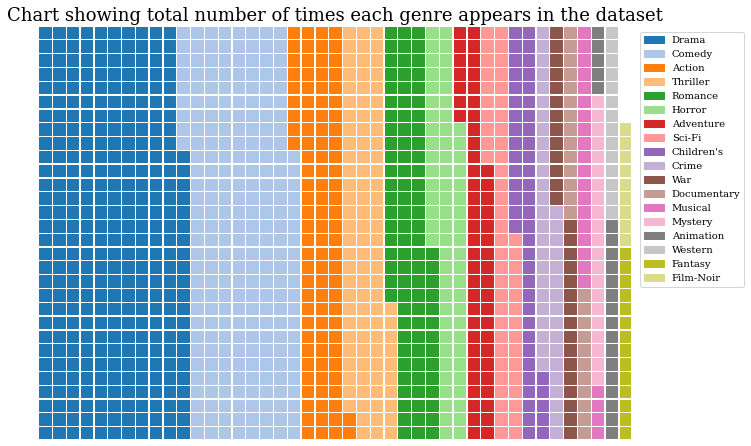

In [30]:
values = genre_counts['total_counts']
fig = plt.figure(
    FigureClass=Waffle, 
    rows=30, 
    values=list(genre_counts.total_counts/5),
    labels=list(genre_counts.index),
    figsize=(10, 10),
    legend={'bbox_to_anchor': (1.2, 1.00)},  
    cmap_name = "tab20"
)
plt.title('Chart showing total number of times each genre appears in the dataset', fontsize = 18)
plt.show()

Veiem que Drama, Comèdia i Acció gairebé representen la meitat de la gràfica, són clarament els gèneres més importants. Seguirien després els gèneres Thriller, Romance i Horror. 

També podríem revisar si hi ha alguna relació entre les diferents categories de gènere, és a dir, **si hi han gèneres que estan més relacionats entre ells que altres.**

Per aixó, agafarem totes les películes que tenen almenys cat1 i cat2 de gènere. Per fer-ho, elimimnarem les files que tinquin valor None a cat2.

In [12]:
new_movies = movies.dropna(subset = ['cat2'])
new_movies

,id,title,genre,cat1,cat2,cat3,cat4,cat5,cat6
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
5,6,Heat (1995),Action|Crime|Thriller,Action,Crime,Thriller,None,None,None
...,...,...,...,...,...,...,...,...,...
3867,3937,Runaway (1984),Sci-Fi|Thriller,Sci-Fi,Thriller,None,None,None,None
3874,3944,Bootmen (2000),Comedy|Drama,Comedy,Drama,None,None,None,None
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's,Adventure,Animation,Children's,None,None,None
3876,3946,Get Carter (2000),Action|Drama|Thriller,Action,Drama,Thriller,None,None,None


Ara ja podem mirar les relacions entre els gèneres, farem en aquest cas un **Diagrama de Sankey**, que ens mostra visualment les relacions entre diferents variables categòriques. 

<function matplotlib.pyplot.show(close=None, block=None)>

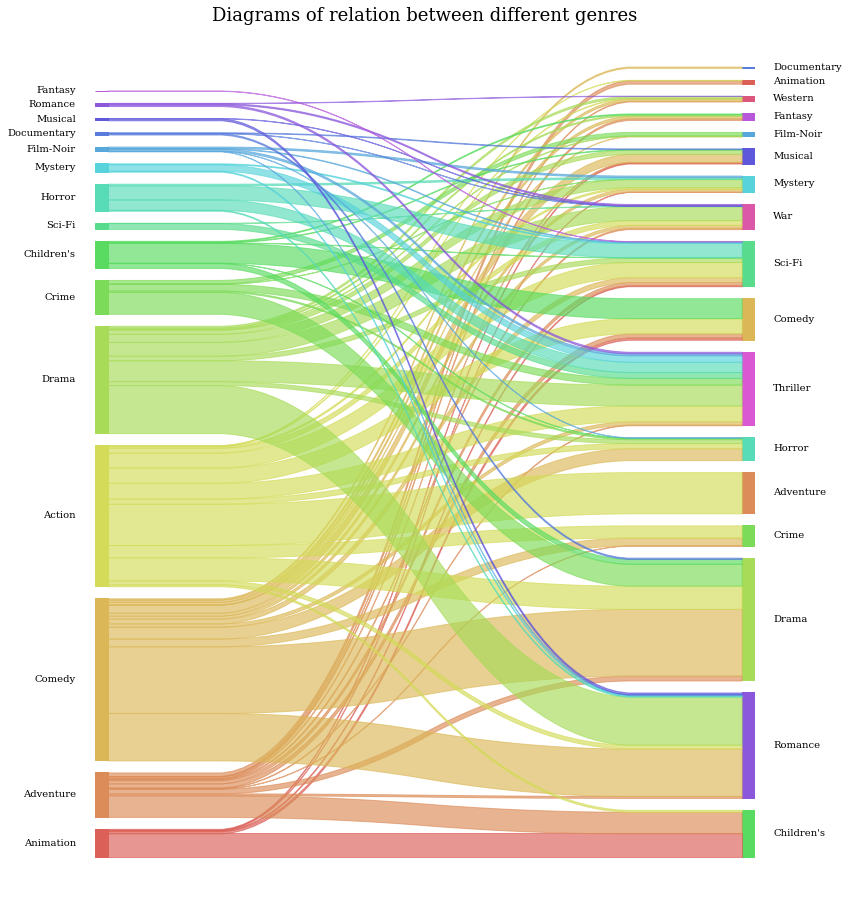

In [34]:


sankey.sankey(new_movies['cat1'],new_movies['cat2'],aspect=20,fontsize=10)
plt.gcf().set_size_inches(13,16)
plt.savefig('genres.png',bbox_inches='tight',dpi=150)
plt.title('Diagrams of relation between different genres', fontsize = 18)
plt.show

Clarament veiem que hi han gèneres que estan molt relacionats entre ells, **descriurem els més importants:**
+ Horror -> Sci-Fi i Thriller 
+ Children's -> Comedy 
+ Crime -> Drama i Thriller
+ Drama -> Romance i Thriller 
+ Action -> Comedy, Sci-Fi, Adventure i Drama 
+ Comedy -> Drama, Romance i Horror 
+ Adventure -> Children's 
+ Animation -> Children's 
+ Thriller -> Horror, Drama i Action
+ Romance -> Drama i Comedy

El diagrama de Sankey ens permet veure de forma ràpida els fluxes més significatius de les relacions entre la primera i segona categoria dels gèneres de les películes. 